# Basic Data Preparation
1. Download and split data into train and test set
2. Preliminary examination of feature distributions

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# local import
from rdforecast import datasets

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. Retrieve Data

In [2]:
# retrieve data from source url
data = datasets.load_training_data()

'filepath' not given, download data from: https://s3-ap-southeast-1.amazonaws.com/grab-aiforsea-dataset/traffic-management.zip
Data loaded.
N: 4206321
  geohash6  day timestamp    demand
0   qp03wc   18      20:0  0.020072
1   qp03pn   10     14:30  0.024721
2   qp09sw    9      6:15  0.102821


In [4]:
data = datasets.check_sanity(data)

No missing values found.
First day in sequence: 1
Last day in sequence: 61


In [7]:
# train, test = datasets.split_train_test(df, path='./input/')
train, test = datasets.split_train_test(data)

Train data size: 3213492 (47 days)
Shape: (3213492, 4)

Test data size: 992829 (14 days)
Shape: (992829, 4)


# 2. Explore Data

In [8]:
df = datasets.process_timestamp(data)

In [9]:
demands = df['demand'].values
taz_activity = df['geohash6'].value_counts().values
daily_activity = df['day'].value_counts().sort_index()
hourly_activity = df['hour'].value_counts().sort_index()

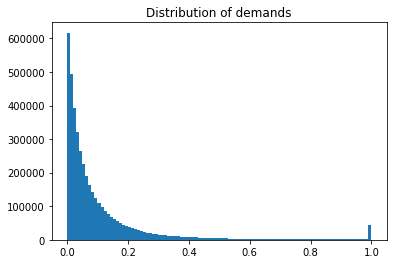

In [10]:
plt.hist(demands, bins=100)
plt.title('Distribution of demands');

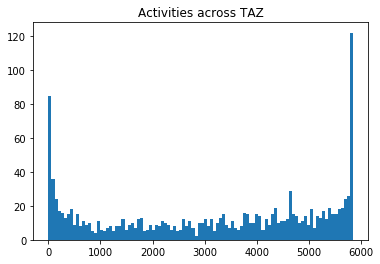

In [11]:
plt.hist(taz_activity, bins=100)
plt.title('Activities across TAZ');

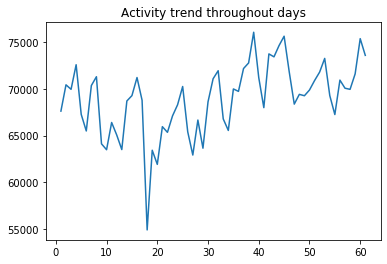

In [12]:
plt.plot(daily_activity)
plt.title('Activity trend throughout days');

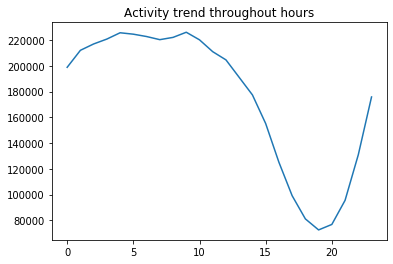

In [13]:
plt.plot(hourly_activity)
plt.title('Activity trend throughout hours');